<h3>This notebook is regarding a task assosiate with the data used in this notebook</h3>

**In this task I did some descriptive statistics based on:**

1. What is the mean value of daily yield?
2. What is the total irradiation per day?
3. What is the max ambient and module temperature?
4. How many inverters are there for each plant?
5. What is the maximum/minimum amount of DC/AC Power generated in a time interval/day?
6. Which inverter (source_key) has produced maximum DC/AC power?
7. Rank the inverters based on the DC/AC power they produce
8. Is there any missing data?

**Data Source from:** https://www.kaggle.com/anikannal/solar-power-generation-data/tasks?taskId=1749

In [55]:
import warnings
warnings.filterwarnings('ignore')

In [56]:
#Import the basic libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [57]:
plant_1_sensor = pd.read_csv("Plant_1_Weather_Sensor_Data.csv")
plant_2_sensor = pd.read_csv("Plant_2_Weather_Sensor_Data.csv")
plant_1_generation = pd.read_csv("Plant_1_Generation_Data.csv")
plant_2_generation = pd.read_csv("Plant_2_Generation_Data.csv")

In [58]:
print(plant_1_sensor.shape,plant_1_generation.shape,plant_2_sensor.shape,plant_2_generation.shape)
#Get the data shape

(3182, 6) (68778, 7) (3259, 6) (67698, 7)


In [59]:
plant_1_sensor.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
1,2020-05-15 00:15:00,4135001,HmiyD2TTLFNqkNe,25.084589,22.761668,0.0
2,2020-05-15 00:30:00,4135001,HmiyD2TTLFNqkNe,24.935753,22.592306,0.0
3,2020-05-15 00:45:00,4135001,HmiyD2TTLFNqkNe,24.846130,22.360852,0.0
4,2020-05-15 01:00:00,4135001,HmiyD2TTLFNqkNe,24.621525,22.165423,0.0


In [60]:
plant_1_generation.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,15-05-2020 00:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0
1,15-05-2020 00:00,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0
2,15-05-2020 00:00,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0
3,15-05-2020 00:00,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0
4,15-05-2020 00:00,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0


In [61]:
plant_2_sensor.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4136001,iq8k7ZNt4Mwm3w0,27.004764,25.060789,0.0
1,2020-05-15 00:15:00,4136001,iq8k7ZNt4Mwm3w0,26.880811,24.421869,0.0
2,2020-05-15 00:30:00,4136001,iq8k7ZNt4Mwm3w0,26.682055,24.427290,0.0
3,2020-05-15 00:45:00,4136001,iq8k7ZNt4Mwm3w0,26.500589,24.420678,0.0
4,2020-05-15 01:00:00,4136001,iq8k7ZNt4Mwm3w0,26.596148,25.088210,0.0


In [62]:
plant_2_generation[plant_2_generation.DC_POWER > 1000]

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
836,2020-05-15 09:30:00,4136001,4UPUqMRk7TRMgml,1026.060000,1003.133333,1749.200000,2.430760e+06
840,2020-05-15 09:30:00,4136001,IQ2d7wF4YD8zU1Q,1025.878571,1002.942857,1750.428571,1.994328e+07
843,2020-05-15 09:30:00,4136001,Mx2yZCDsyf6DPfv,1019.653333,996.900000,1739.333333,2.455385e+06
844,2020-05-15 09:30:00,4136001,NgDl19wMapZy17u,1005.200000,982.842857,1721.500000,1.115143e+08
846,2020-05-15 09:30:00,4136001,Qf4GUc1pJu5T6c6,1029.046667,1006.026667,1760.000000,8.384231e+08
...,...,...,...,...,...,...,...
64503,2020-06-16 11:30:00,4136001,q49J1IKaHRwDQnt,1095.986667,1070.500000,2393.400000,5.137184e+05
64504,2020-06-16 11:30:00,4136001,rrq4fwE8jgrTyWY,1047.873333,1024.306667,2286.400000,1.211246e+08
64505,2020-06-16 11:30:00,4136001,vOuJvMaM2sgwLmb,1131.673333,1103.980000,2460.266667,2.420295e+06
64506,2020-06-16 11:30:00,4136001,xMbIugepa2P7lBB,1110.566667,1084.640000,2442.066667,1.068891e+08


**Checking percentage of unique values in all 4 datasets**

In [63]:
print("*******************Plant_1_Sensor*****************")
print(plant_1_sensor.nunique()/plant_1_sensor.shape[0]*100)
print("*******************Plant_1_Generation*****************")
print(plant_1_generation.nunique()/plant_1_generation.shape[0]*100)
print("*******************Plant_2_Sensor*****************")
print(plant_2_sensor.nunique()/plant_2_sensor.shape[0]*100)
print("*******************Plant_2_Generation*****************")
print(plant_2_generation.nunique()/plant_2_generation.shape[0]*100)

*******************Plant_1_Sensor*****************
DATE_TIME              100.000000
PLANT_ID                 0.031427
SOURCE_KEY               0.031427
AMBIENT_TEMPERATURE    100.000000
MODULE_TEMPERATURE     100.000000
IRRADIATION             55.248272
dtype: float64
*******************Plant_1_Generation*****************
DATE_TIME       4.591585
PLANT_ID        0.001454
SOURCE_KEY      0.031987
DC_POWER       47.848149
AC_POWER       47.523918
DAILY_YIELD    43.473204
TOTAL_YIELD    54.184478
dtype: float64
*******************Plant_2_Sensor*****************
DATE_TIME              100.000000
PLANT_ID                 0.030684
SOURCE_KEY               0.030684
AMBIENT_TEMPERATURE    100.000000
MODULE_TEMPERATURE     100.000000
IRRADIATION             57.164774
dtype: float64
*******************Plant_2_Generation*****************
DATE_TIME       4.814027
PLANT_ID        0.001477
SOURCE_KEY      0.032497
DC_POWER       45.411977
AC_POWER       45.379479
DAILY_YIELD    44.824072
TOTAL_YIEL

In [64]:
print(plant_1_sensor.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   DATE_TIME            3182 non-null   object 
 1   PLANT_ID             3182 non-null   int64  
 2   SOURCE_KEY           3182 non-null   object 
 3   AMBIENT_TEMPERATURE  3182 non-null   float64
 4   MODULE_TEMPERATURE   3182 non-null   float64
 5   IRRADIATION          3182 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 149.3+ KB
None


In [65]:
print(plant_1_generation.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68778 entries, 0 to 68777
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATE_TIME    68778 non-null  object 
 1   PLANT_ID     68778 non-null  int64  
 2   SOURCE_KEY   68778 non-null  object 
 3   DC_POWER     68778 non-null  float64
 4   AC_POWER     68778 non-null  float64
 5   DAILY_YIELD  68778 non-null  float64
 6   TOTAL_YIELD  68778 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 3.7+ MB
None


In [66]:
print(plant_2_sensor.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3259 entries, 0 to 3258
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   DATE_TIME            3259 non-null   object 
 1   PLANT_ID             3259 non-null   int64  
 2   SOURCE_KEY           3259 non-null   object 
 3   AMBIENT_TEMPERATURE  3259 non-null   float64
 4   MODULE_TEMPERATURE   3259 non-null   float64
 5   IRRADIATION          3259 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 152.9+ KB
None


In [67]:
print(plant_2_generation.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67698 entries, 0 to 67697
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATE_TIME    67698 non-null  object 
 1   PLANT_ID     67698 non-null  int64  
 2   SOURCE_KEY   67698 non-null  object 
 3   DC_POWER     67698 non-null  float64
 4   AC_POWER     67698 non-null  float64
 5   DAILY_YIELD  67698 non-null  float64
 6   TOTAL_YIELD  67698 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 3.6+ MB
None


**In the next few lines we will work with datetime**

In [68]:
from datetime import datetime

**In our dataset `DATE_TIME` is of object type.
We will convert it to datetime type. We will also extract date part from timestamp data.**


In [69]:
plant_1_generation['DATE'] = [datetime.strftime(i,format="%d-%m-%Y") for i in pd.to_datetime(plant_1_generation.DATE_TIME)]
plant_1_generation['DATE'] = pd.to_datetime(plant_1_generation['DATE'])

In [70]:
plant_2_generation['DATE'] = [datetime.strftime(i,format="%Y-%m-%d") for i in pd.to_datetime(plant_2_generation.DATE_TIME)]
plant_2_generation['DATE'] = pd.to_datetime(plant_2_generation['DATE'])

In [71]:
plant_1_sensor['DATE'] = [datetime.strftime(i,format="%Y-%m-%d") for i in pd.to_datetime(plant_1_sensor.DATE_TIME)]
plant_1_sensor['DATE'] = pd.to_datetime(plant_1_sensor['DATE'])

In [72]:
plant_2_sensor['DATE'] = [datetime.strftime(i,format="%Y-%m-%d") for i in pd.to_datetime(plant_2_sensor.DATE_TIME)]
plant_2_sensor['DATE'] = pd.to_datetime(plant_2_sensor['DATE'])

**Extracting `Year`,`Month`,`Day` from `DATE` Column and creating 3 new features. This will help us to solve some questions related to daily production or rate.**


In [73]:
plant_1_generation['YEAR'] = [datetime.strftime(i,format="%Y") for i in plant_1_generation.DATE]
plant_1_generation['MONTH'] = [datetime.strftime(i,format="%m") for i in plant_1_generation.DATE]
plant_1_generation['DAY'] = [datetime.strftime(i,format="%d") for i in plant_1_generation.DATE]

In [74]:
plant_2_generation['YEAR'] = [datetime.strftime(i,format="%Y") for i in plant_2_generation.DATE]
plant_2_generation['MONTH'] = [datetime.strftime(i,format="%m") for i in plant_2_generation.DATE]
plant_2_generation['DAY'] = [datetime.strftime(i,format="%d") for i in plant_2_generation.DATE]

In [75]:
plant_1_sensor['YEAR'] = [datetime.strftime(i,format="%Y") for i in plant_1_sensor.DATE]
plant_1_sensor['MONTH'] = [datetime.strftime(i,format="%m") for i in plant_1_sensor.DATE]
plant_1_sensor['DAY'] = [datetime.strftime(i,format="%d") for i in plant_1_sensor.DATE]

In [76]:
plant_2_sensor['YEAR'] = [datetime.strftime(i,format="%Y") for i in plant_2_sensor.DATE]
plant_2_sensor['MONTH'] = [datetime.strftime(i,format="%m") for i in plant_2_sensor.DATE]
plant_2_sensor['DAY'] = [datetime.strftime(i,format="%d") for i in plant_2_sensor.DATE]

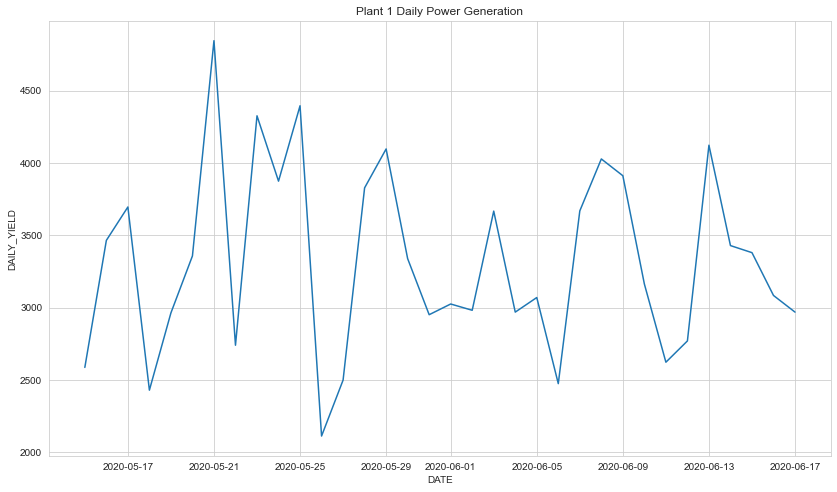

In [77]:
sns.set_style('whitegrid')
plt.figure(figsize=(14,8))
fig=sns.lineplot(data=plant_1_generation,x='DATE',y='DAILY_YIELD',ci=None)
fig.set_title('Plant 1 Daily Power Generation')
plt.show()

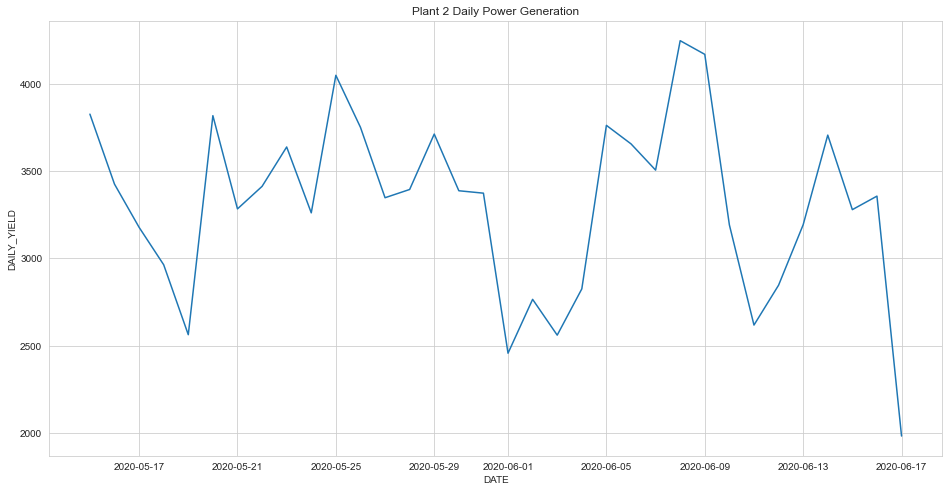

In [78]:
sns.set_style('whitegrid')
plt.figure(figsize=(16,8))
sns.lineplot(data=plant_2_generation,x='DATE',y='DAILY_YIELD',ci=None)
plt.title('Plant 2 Daily Power Generation')
plt.show()

<h3>Now we will solve actual questions mentioned in task :)</h3>

# Q1. What is the mean value of daily yield?


**steps**

>Group data by `each_day`

>calculate sum of each day yield

>at last calculate mean

In [79]:
plant_1_daily_yield_mean = plant_1_generation.groupby(['DATE']).DAILY_YIELD.sum().mean() 
plant_2_daily_yield_mean = plant_2_generation.groupby(['DATE']).DAILY_YIELD.sum().mean()

In [80]:
print(plant_1_daily_yield_mean,plant_2_daily_yield_mean)

6667356.9942924855 6560514.211855301


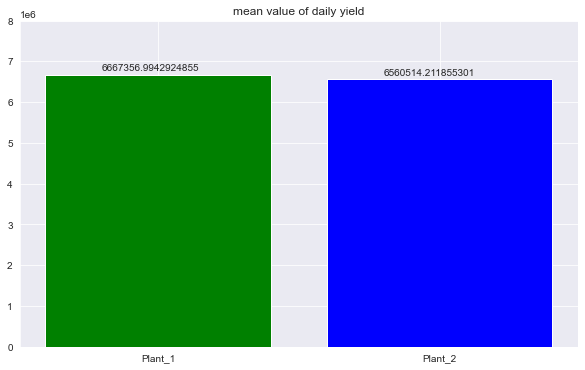

In [81]:
sns.set_style('darkgrid')
plt.figure(figsize=(10,6))
plt.bar(x=['Plant_1','Plant_2'],height=[plant_1_daily_yield_mean,plant_2_daily_yield_mean],color=["green","blue"])
for i,j in enumerate([plant_1_daily_yield_mean,plant_2_daily_yield_mean]):
    plt.text(i-0.2,j+100000,str(j))
plt.title("mean value of daily yield")
plt.yticks(range(0,8000001,1000000))
plt.show()

<h3>Conclusion : So plant 1 is generating more power than plant 2</h3>

# Q2. What is the total irradiation per day?

**steps :**

> Group by DAY

>Calculate aggregate sum of each day

>create dataframe for better formating

In [82]:
plant_1_irradiation = plant_1_sensor.groupby(['DATE']).IRRADIATION.sum()
plant_2_irradiation = plant_2_sensor.groupby(['DATE']).IRRADIATION.sum()

In [83]:
pd.DataFrame({'Date':plant_1_irradiation.index,'Plant_1_Daily_Irradiation':plant_1_irradiation.values,'Plant_2_Daily_Irradiation':plant_2_irradiation.values})

,Date,Plant_1_Daily_Irradiation,Plant_2_Daily_Irradiation
0,2020-05-15,19.037010,28.559055
1,2020-05-16,18.651690,23.676573
2,2020-05-17,22.931378,21.233595
3,2020-05-18,15.266485,21.495780
4,2020-05-19,18.044861,20.345321
5,2020-05-20,18.245542,26.786871
6,2020-05-21,23.556170,27.191185
7,2020-05-22,22.119123,28.535843
8,2020-05-23,26.106652,28.159981
9,2020-05-24,24.937180,27.426044


# Q3. What is the max ambient and module temperature?

In [84]:
max_amb_modu_temp =pd.DataFrame({'Max_Ambient':[plant_1_sensor.AMBIENT_TEMPERATURE.max(),plant_2_sensor.AMBIENT_TEMPERATURE.max()],
                                 'Max_Module':[plant_1_sensor.MODULE_TEMPERATURE.max(),plant_2_sensor.MODULE_TEMPERATURE.max()]},index=['Plant_1','Plant_2'])
max_amb_modu_temp

,Max_Ambient,Max_Module
Plant_1,35.252486,65.545714
Plant_2,39.181638,66.635953


# Q4. How many inverters are there for each plant?

>Source key is a unique key for each inverter used in power plant

In [85]:
print("No. of inverters in Plant_1 : ",len(plant_1_generation.SOURCE_KEY.value_counts()))
print("No. of inverters in Plant_2 : ",len(plant_2_generation.SOURCE_KEY.value_counts()))

No. of inverters in Plant_1 :  22
No. of inverters in Plant_2 :  22


# Q4. What is the maximum/minimum amount of DC/AC Power generated in a time interval/day?

# Plant_1_Min_Max

In [86]:
pd.DataFrame({'DC_Power_Max':plant_1_generation.groupby(['DATE']).DC_POWER.max().values,'DC_Power_Min':plant_1_generation.groupby(['DATE']).DC_POWER.min().values,
              'AC_Power_Max':plant_1_generation.groupby(['DATE']).AC_POWER.max().values,'AC_Power_Min':plant_1_generation.groupby(['DATE']).AC_POWER.min().values},
             index=plant_1_generation.groupby(['DATE']).DC_POWER.max().index)

,DC_Power_Max,DC_Power_Min,AC_Power_Max,AC_Power_Min
DATE,,,,
2020-05-15,12319.14286,0.0,1201.442857,0.0
2020-05-16,11986.57143,0.0,1168.842857,0.0
2020-05-17,13217.42857,0.0,1288.900000,0.0
2020-05-18,13382.75000,0.0,1304.825000,0.0
2020-05-19,11911.50000,0.0,1162.600000,0.0
2020-05-20,13241.14286,0.0,1291.000000,0.0
2020-05-21,14038.28571,0.0,1368.700000,0.0
2020-05-22,14300.28571,0.0,1394.285714,0.0
2020-05-23,13848.00000,0.0,1350.214286,0.0


# Plant_2_Min_Max

In [87]:
pd.DataFrame({'DC_Power_Max':plant_2_generation.groupby(['DATE']).DC_POWER.max().values,'DC_Power_Min':plant_2_generation.groupby(['DATE']).DC_POWER.min().values,
              'AC_Power_Max':plant_2_generation.groupby(['DATE']).AC_POWER.max().values,'AC_Power_Min':plant_2_generation.groupby(['DATE']).AC_POWER.min().values},
             index=plant_2_generation.groupby(['DATE']).DC_POWER.max().index)

,DC_Power_Max,DC_Power_Min,AC_Power_Max,AC_Power_Min
DATE,,,,
2020-05-15,1331.966667,0.0,1298.673333,0.0
2020-05-16,1314.426667,0.0,1281.573333,0.0
2020-05-17,1152.142857,0.0,1124.492857,0.0
2020-05-18,1273.706667,0.0,1241.866667,0.0
2020-05-19,1361.220000,0.0,1327.193333,0.0
2020-05-20,1336.207143,0.0,1302.792857,0.0
2020-05-21,1340.066667,0.0,1306.573333,0.0
2020-05-22,1333.873333,0.0,1300.520000,0.0
2020-05-23,1325.600000,0.0,1292.471429,0.0


# Q5. Which inverter (source_key) has produced maximum DC/AC power?

**steps :**

>In a data frame create 3 key-value pairs of Max_DC,Mac_AC, and the source key of those inverters which are generating these outputs.

>Group data by Source_Key and find aggregate sum and then find maximum values by sorting them in descending order.

In [88]:
dc_ac =pd.DataFrame({'Inverter_Source_Key':[plant_1_generation.groupby(['SOURCE_KEY']).DC_POWER.sum().sort_values(ascending=False).index[0],
                    plant_2_generation.groupby(['SOURCE_KEY']).DC_POWER.sum().sort_values(ascending=False).index[0]],
                    'Max_DC':[plant_1_generation.groupby(['SOURCE_KEY']).DC_POWER.sum().max(),plant_2_generation.groupby(['SOURCE_KEY']).DC_POWER.sum().max()],
                        'Max_AC':[plant_1_generation.groupby(['SOURCE_KEY']).AC_POWER.sum().max(),plant_2_generation.groupby(['SOURCE_KEY']).AC_POWER.sum().max()],
                     },index=['Plant_1','Plant_2'])
dc_ac

,Inverter_Source_Key,Max_DC,Max_AC
Plant_1,adLQvlD726eNBSB,1.019778e+07,997125.156663
Plant_2,Mx2yZCDsyf6DPfv,9.106173e+05,890317.270321


# Q6. Rank the inverters based on the DC/AC power they produce 

# Plant_1

In [89]:
index_dc_p1 = plant_1_generation.groupby(['SOURCE_KEY']).DC_POWER.sum().sort_values(ascending=False).index
index_ac_p1 = plant_1_generation.groupby(['SOURCE_KEY']).AC_POWER.sum().sort_values(ascending=False).index

In [90]:
#Reason to create this is so that we can create a single dataframe for both AC and DC production ranking.
#Through this we can give excat rating to each inverter w.r.t their production.

ac_dict_p1 = dict() 
for i,j in zip(index_dc_p1,range(1,23,1)):
    ac_dict_p1[i] = j
ac_pr_per_dc_rank = []
for i in index_dc_p1:
    ac_pr_per_dc_rank.append(ac_dict_p1[i])
ac_pr_per_dc_rank

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]

In [91]:
plant_1_dc_ac_rank = pd.DataFrame({'Plant_1_Inverter_Source_Key':index_dc_p1,'DC_Production_Rank':range(1,23,1),'AC_Production_Rank':ac_pr_per_dc_rank})
plant_1_dc_ac_rank

,Plant_1_Inverter_Source_Key,DC_Production_Rank,AC_Production_Rank
0,adLQvlD726eNBSB,1,1
1,1IF53ai7Xc0U56Y,2,2
2,VHMLBKoKgIrUVDU,3,3
3,3PZuoBAID5Wc2HD,4,4
4,McdE0feGgRqW7Ca,5,5
5,ZnxXDlPa8U1GXgE,6,6
6,iCRJl6heRkivqQ3,7,7
7,uHbuxQJl8lW7ozc,8,8
8,zVJPv84UY57bAof,9,9
9,wCURE6d3bPkepu2,10,10


# Plant_2

**We will do same process for plant_2**

In [92]:
index_dc_p2 = plant_2_generation.groupby(['SOURCE_KEY']).DC_POWER.sum().sort_values(ascending=False).index
index_ac_p2 = plant_2_generation.groupby(['SOURCE_KEY']).AC_POWER.sum().sort_values(ascending=False).index

In [93]:
ac_dict_p2 = dict()
for i,j in zip(index_dc_p2,range(1,23,1)):
    ac_dict_p2[i] = j
ac_pr_per_dc_rank_p2 = []
for i in index_dc_p2:
    ac_pr_per_dc_rank_p2.append(ac_dict_p2[i])
ac_pr_per_dc_rank_p2

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]

In [94]:
plant_2_dc_ac_rank = pd.DataFrame({'Plant_2_Inverter_Source_Key':index_dc_p2,'DC_Production_Rank':range(1,23,1),'AC_Production_Rank':ac_pr_per_dc_rank_p2})
plant_2_dc_ac_rank

,Plant_2_Inverter_Source_Key,DC_Production_Rank,AC_Production_Rank
0,Mx2yZCDsyf6DPfv,1,1
1,Qf4GUc1pJu5T6c6,2,2
2,4UPUqMRk7TRMgml,3,3
3,oZ35aAeoifZaQzV,4,4
4,V94E5Ben1TlhnDV,5,5
5,vOuJvMaM2sgwLmb,6,6
6,oZZkBaNadn6DNKz,7,7
7,PeE6FRyGXUgsRhN,8,8
8,LlT2YUhhzqhg5Sw,9,9
9,WcxssY2VbP4hApt,10,10


# Q7. Is there any missing data?

>We will see percentage of Missing or NaN in each column of each dataframe

In [95]:
print("*******************Plant_1_Sensor*****************")
print(plant_1_sensor.isna().sum()/plant_1_sensor.shape[0]*100)
print("*******************Plant_1_Generation*****************")
print(plant_1_generation.isna().sum()/plant_1_generation.shape[0]*100)
print("*******************Plant_2_Sensor*****************")
print(plant_2_sensor.isna().sum()/plant_2_sensor.shape[0]*100)
print("*******************Plant_2_Generation*****************")
print(plant_2_generation.isna().sum()/plant_2_generation.shape[0]*100)

*******************Plant_1_Sensor*****************
DATE_TIME              0.0
PLANT_ID               0.0
SOURCE_KEY             0.0
AMBIENT_TEMPERATURE    0.0
MODULE_TEMPERATURE     0.0
IRRADIATION            0.0
DATE                   0.0
YEAR                   0.0
MONTH                  0.0
DAY                    0.0
dtype: float64
*******************Plant_1_Generation*****************
DATE_TIME      0.0
PLANT_ID       0.0
SOURCE_KEY     0.0
DC_POWER       0.0
AC_POWER       0.0
DAILY_YIELD    0.0
TOTAL_YIELD    0.0
DATE           0.0
YEAR           0.0
MONTH          0.0
DAY            0.0
dtype: float64
*******************Plant_2_Sensor*****************
DATE_TIME              0.0
PLANT_ID               0.0
SOURCE_KEY             0.0
AMBIENT_TEMPERATURE    0.0
MODULE_TEMPERATURE     0.0
IRRADIATION            0.0
DATE                   0.0
YEAR                   0.0
MONTH                  0.0
DAY                    0.0
dtype: float64
*******************Plant_2_Generation************

**For more projects please follow me at :https://github.com/manubungei**

# Thank You :)